In [1]:
# Importing important libraries for analysis

# %matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point,Polygon
import contextily as cx
import osmnx as ox

In [1]:
for i in range(11):
    print(i)

0
1
2
3
4
5
6
7
8
9
10


In [2]:
# Defining path to excel files

# IMPORTANT note on file locations:
# We assume there is a folder called 'data' in the same location as this notebook. 
# This 'data' folder should contain the three folders from Brightspace: WBSIM,RMMS,BMMS  
# Note that this is different from the folder structure contained in our zip file (with raw and processed folders).

BMMS_link = 'data/WBSIM/infrastructure/BMMS_overview.xlsx'
Bridges_link = 'data/WBSIM/infrastructure/Bridges.xlsx'
# reading the _roads.tcv file and putting it in a Pandas DataFrame
roads_path = 'data/WBSIM/infrastructure/_roads.tcv'
# Specify the column names to read the file properly
col_names = ['col'+str(i) for i in range(4045)]
roads_df = pd.read_csv(roads_path, sep='\t', index_col=False,header=0,names=col_names)

FileNotFoundError: [Errno 2] No such file or directory: 'data/WBSIM/infrastructure/_roads.tcv'

In [8]:
# Reading excel file in python
BMMS = pd.read_excel(BMMS_link)
Bridges = pd.read_excel(Bridges_link,index_col = "Number")
# Roads = pd.read_csv(Roads_link,sep='\t')

In [9]:
BMMS.head()

,road,km,type,LRPName,name,length,condition,structureNr,roadName,chainage,width,constructionYear,spans,zone,circle,division,sub-division,lat,lon,EstimatedLoc
0,N1,1.800,Box Culvert,LRP001a,.,11.30,A,117861,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,1.8,19.5,2005.0,2.0,Dhaka,Dhaka,Narayanganj,Narayanganj-1,23.702889,90.450389,bcs1
1,N1,4.925,Box Culvert,LRP004b,.,6.60,A,117862,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,4.925,35.4,2006.0,1.0,Dhaka,Dhaka,Narayanganj,Narayanganj-1,23.693611,90.478833,bcs1
2,N1,8.976,PC Girder Bridge,LRP008b,Kanch pur Bridge.,394.23,A,119889,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,8.976,NaN,NaN,NaN,Dhaka,Dhaka,Narayanganj,Narayanganj-1,23.704583,90.518833,road_precise
3,N1,10.880,Box Culvert,LRP010b,NOYAPARA CULVERT,6.30,A,112531,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,10.88,12.2,1992.0,2.0,Dhaka,Dhaka,Narayanganj,Vitikandi,23.699833,90.530722,bcs1
4,N1,10.897,Box Culvert,LRP010c,ADUPUR CULVERT,6.30,A,112532,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,10.897,12.2,1984.0,2.0,Dhaka,Dhaka,Narayanganj,Vitikandi,23.699667,90.530722,bcs1


In [10]:
BMMS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21407 entries, 0 to 21406
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   road              21407 non-null  object 
 1   km                21406 non-null  float64
 2   type              21407 non-null  object 
 3   LRPName           21407 non-null  object 
 4   name              21060 non-null  object 
 5   length            21398 non-null  float64
 6   condition         21407 non-null  object 
 7   structureNr       21407 non-null  int64  
 8   roadName          21406 non-null  object 
 9   chainage          21407 non-null  object 
 10  width             18290 non-null  float64
 11  constructionYear  18289 non-null  float64
 12  spans             18290 non-null  float64
 13  zone              21406 non-null  object 
 14  circle            21406 non-null  object 
 15  division          21406 non-null  object 
 16  sub-division      21406 non-null  object

In [11]:
BMMS.isnull().sum()

road                   0
km                     1
type                   0
LRPName                0
name                 347
length                 9
condition              0
structureNr            0
roadName               1
chainage               0
width               3117
constructionYear    3118
spans               3117
zone                   1
circle                 1
division               1
sub-division           1
lat                   94
lon                   94
EstimatedLoc           0
dtype: int64

In [12]:
# Checking null values in the dataframes
print ("BMMS null values \n", BMMS.isnull().sum(),"\n\n")

BMMS null values 
 road                   0
km                     1
type                   0
LRPName                0
name                 347
length                 9
condition              0
structureNr            0
roadName               1
chainage               0
width               3117
constructionYear    3118
spans               3117
zone                   1
circle                 1
division               1
sub-division           1
lat                   94
lon                   94
EstimatedLoc           0
dtype: int64 




In [13]:
# 94 entries in BMMS does not have geo-coordinates
# Hence, practically impossible to accurately locate those roads by name and region
# Thus dropping entries with missing lat and lon in BMMS database
BMMS = BMMS.dropna(subset=['lat','lon'])


In [14]:
# creating Point geometries for the bridges based on longitude and latitude
crs = {'init':'epsg:4326'}
geometry = [Point(xy) for xy in zip(BMMS.lon,BMMS.lat)]
BMMS_geo = gpd.GeoDataFrame(BMMS,crs=crs,geometry=geometry)
BMMS_geo = BMMS_geo.to_crs(epsg=3857)

/Users/arnoud/Documents/programming/Python/miniconda3/envs/gds/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


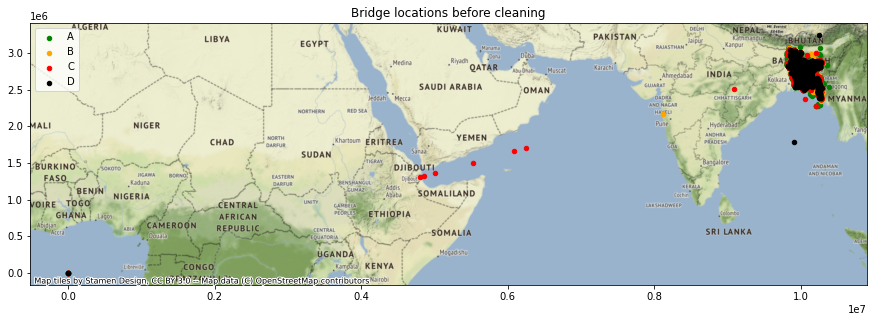

In [20]:
f,ax = plt.subplots(figsize=(15,15))
BMMS_geo[BMMS_geo.condition == 'A' ].plot(ax=ax,markersize=20,color='green',marker='o',label='A')
BMMS_geo[BMMS_geo.condition == 'B' ].plot(ax=ax,markersize=20,color='orange',marker='o',label='B')
BMMS_geo[BMMS_geo.condition == 'C' ].plot(ax=ax,markersize=20,color='red',marker='o',label='C')
BMMS_geo[BMMS_geo.condition == 'D' ].plot(ax=ax,markersize=20,color='black',marker='o',label='D')
ax.set_title('Bridge locations before cleaning')
plt.legend()
cx.add_basemap(ax=ax)

In [ ]:
# Bangladesh = BMMS_geo.geometry.unary_union

<AxesSubplot:>

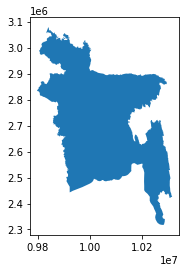

In [21]:
# Extracting the shape of Bangladesh from OpenStreetMaps
ox.config(log_console=True, use_cache=True)
gdf_Bangladesh = ox.geocode_to_gdf(['Bangladesh'])
Bangladesh_poly = gdf_Bangladesh.to_crs(epsg=3857)
Bangladesh_poly.plot()

In [22]:
# Creating boundary file of Bangladesh
Bangladesh  = Bangladesh_poly.unary_union

In [23]:
# Creating a dataframe of bridges inside Bangladesh using within funciton
Inside_Bangladesh = BMMS_geo[BMMS_geo.geometry.within(Bangladesh)]
# Creating a dataframe of bridges outside Bangladesh using within function
# Note: ~ operator is used for 'NOT'
Outside_Bangladesh = BMMS_geo[~BMMS_geo.geometry.within(Bangladesh)]

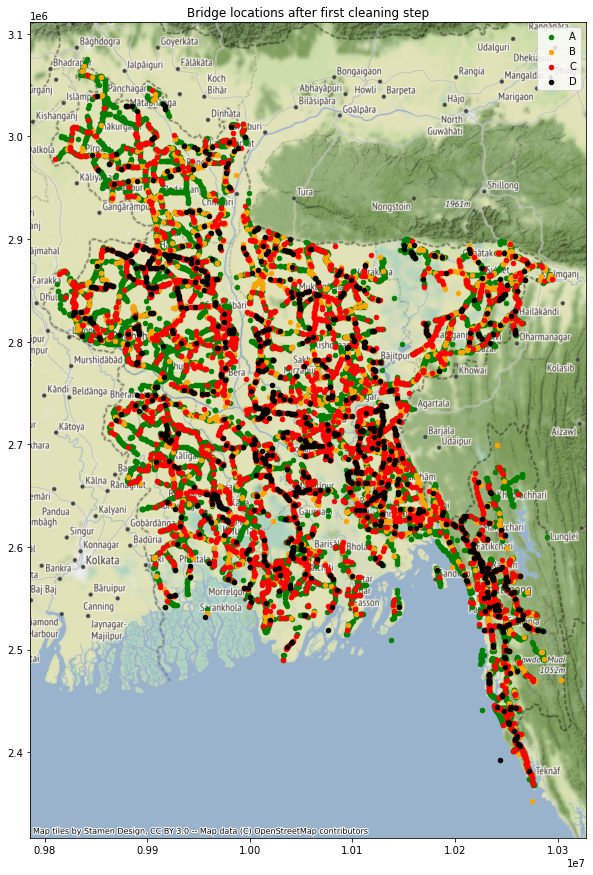

In [24]:
# Checking if Inside_Bangladesh is correct by plotting bridges inside Bangladesh
f,ax = plt.subplots(figsize=(15,15))
Inside_Bangladesh[Inside_Bangladesh.condition == 'A' ].plot(ax=ax,markersize=20,color='green',marker='o',label='A')
Inside_Bangladesh[Inside_Bangladesh.condition == 'B' ].plot(ax=ax,markersize=20,color='orange',marker='o',label='B')
Inside_Bangladesh[Inside_Bangladesh.condition == 'C' ].plot(ax=ax,markersize=20,color='red',marker='o',label='C')
Inside_Bangladesh[Inside_Bangladesh.condition == 'D' ].plot(ax=ax,markersize=20,color='black',marker='o',label='D')
ax.set_title('Bridge locations after first cleaning step')
plt.legend()
cx.add_basemap(ax=ax)

In [ ]:
# To interchange lat and lon, I have renamed the columns. For some reason I had to do it in two steps to avoid errors
Outside_Bangladesh.rename(columns = {'lat':'Lon','lon':'Lat'})
Outside_Bangladesh.rename(columns = {'Lon':'lon','Lat':'lat'})
# This operation reversed the order 

In [ ]:
# Getting list of column names in desired order
column_titles = Inside_Bangladesh.columns
# Reindexing columns in Outside_Bangladesh file to have same indexing of column names across all files
Outside_Bangladesh = Outside_Bangladesh.reindex(columns = column_titles)

In [ ]:
# Creating new geometry for bridges as per revised lat - lon
geometry = [Point(xy) for xy in zip(Outside_Bangladesh.lon,Outside_Bangladesh.lat)]
Outside_Bangladesh["geometry"] = geometry
Outside_Bangladesh = Outside_Bangladesh.to_crs(epsg=3857)

In [ ]:
# Now selecting bridges inside Bangladesh from dataframe and droping rest
Outside_Bangladesh = Outside_Bangladesh[Outside_Bangladesh.geometry.within(Bangladesh)]

In [ ]:
# Appending these dataframes
Inside_Bangladesh = Inside_Bangladesh.append(Outside_Bangladesh)

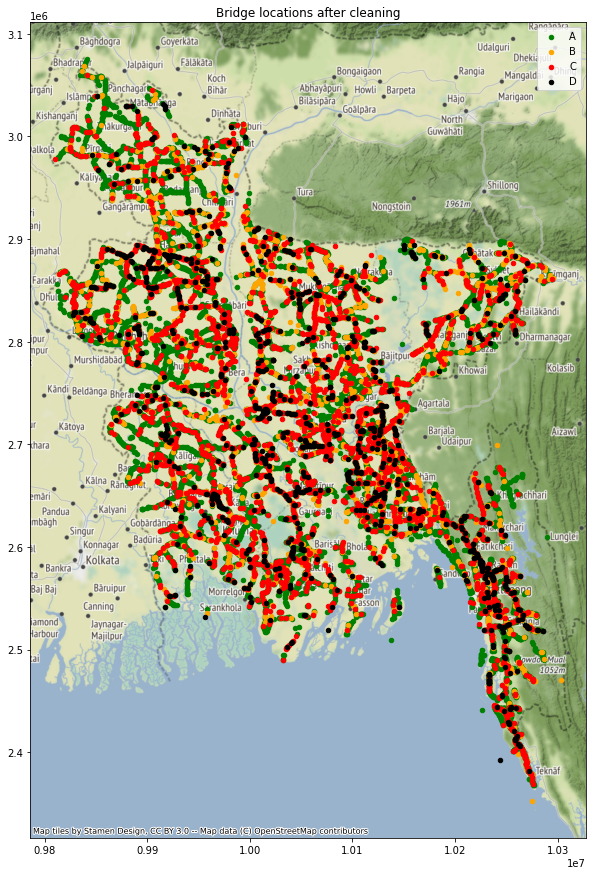

In [25]:
# Plotting final results
f,ax = plt.subplots(figsize=(15,15))
Inside_Bangladesh[Inside_Bangladesh.condition == 'A' ].plot(ax=ax,markersize=20,color='green',marker='o',label='A')
Inside_Bangladesh[Inside_Bangladesh.condition == 'B' ].plot(ax=ax,markersize=20,color='orange',marker='o',label='B')
Inside_Bangladesh[Inside_Bangladesh.condition == 'C' ].plot(ax=ax,markersize=20,color='red',marker='o',label='C')
Inside_Bangladesh[Inside_Bangladesh.condition == 'D' ].plot(ax=ax,markersize=20,color='black',marker='o',label='D')
ax.set_title('Bridge locations after cleaning')
plt.legend()
cx.add_basemap(ax=ax)

In [26]:
roads_df.set_index('col0', inplace=True) #Re-index the dataframe to use the roadnames als index column.

In [27]:
roads_df # Check the dataframe

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,...,col4035,col4036,col4037,col4038,col4039,col4040,col4041,col4042,col4043,col4044
col0,,,,,,,,,,,,,,,,,,,,,
N1,LRPS,23.706028,90.443333,LRPSa,23.702917,90.450417,LRPSb,23.702778,90.450472,LRP001,...,92.29825,LRP466c,20.864667,92.298194,LRP467,20.862972,92.298083,LRPE,20.862917,92.298083
N101,LRPS,23.454139,91.212861,LRPSa,23.461889,91.212000,LRP001,23.462944,91.211806,LRP001a,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
N102,LRPS,23.478972,91.118194,LRPSa,23.481583,91.116777,LRPSb,23.486666,91.113361,LRP001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
N103,LRPS,23.957028,91.115528,LRP001,23.961917,91.113611,LRP001a,23.967666,91.111889,LRP002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
N104,LRPS,23.009667,91.399416,LRPSa,23.009278,91.395250,LRP001,23.009306,91.389805,LRP001a,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Z8910,LRPS,22.674722,90.408889,LRPSa,22.675916,90.412556,LRP001,22.675583,90.417166,LRP002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Z8913,LRPS,22.396083,90.688666,LRPSa,22.393027,90.688944,LRPSb,22.392666,90.689083,LRP001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Z8915,LRPS,22.589389,90.619472,LRP001,22.589694,90.623360,LRP001a,22.590027,90.631360,LRP002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
def row_fixer(rowindex:int, threshold): # A function which checks the coordinates of a point within a road with the next point. If the coordinates differ more than the threshhold, the coordinates of the point get replaced by the coordinates of the following point in the road..
    counter=0 # A counter for the amount of adjustments made per row
    for i in range(1,4042,3): # Column 1 has the first latitude, the dataset has 4042 columns and every point exists out of 3 columns..
        latitude1 = roads_df.iloc[rowindex, i] # The first latitude value
        latitude2 = roads_df.iloc[rowindex, i+3] # The latitude value that is compared to latitude1
        
        longitude1 = roads_df.iloc[rowindex, i+1] # The first longitude value
        longitude2 = roads_df.iloc[rowindex, i+4] # The longitude value that is compared to longitude1
        if roads_df.iloc[rowindex, i-1] == 'LRPE':
            break
        if abs(latitude1 - latitude2) > threshold: # If the longitude or latiude between point 1 and 2 differ more than the threshhold, this part of the function triggers.
                counter = counter+1 # A counter for the amount of adjustments made per row
#                 latitude3 = roads_df.iloc[rowindex, i+6] # The latitude of the point after the point being currently compared
#                 newlatitude = (latitude1 + latitude3)/2 # The Average of latitude1 and latitude3, as replacement value
                roads_df.iloc[rowindex, i+3] = latitude1 # Replace the abnormal value with the new value
            
        if abs(longitude1 - longitude2) > threshold:
                counter = counter+1 # A counter for the amount of adjustments made per row
#                 longitude3 = roads_df.iloc[rowindex, i+7] # The logitude of the point after the point being currently compared
#                 newlongitude = (longitude1 + longitude3)/2  # The Average of longitude1 and Longitude3, as replacement value
                roads_df.iloc[rowindex, i+4] = longitude1 # Replace the abnormal value with the new value
    return counter # Return the amount of changes made per row

In [29]:
counter_dict = {} # a dictionary for the amount of changes made per row/road
for i in range(roads_df.shape[0]): # Iterate over each indicidual row
    row_name = roads_df.index[i] # Make the roadname the key of the dictionary entry
    no_fixes = row_fixer(i, 0.3) # Run the function row_fixer for each row, which returns the number of fixes in that row
    counter_dict[row_name] = no_fixes # add the roadname as key and the number of fixes as value in the dictionary counter_dict

In [30]:
for i in counter_dict.keys(): # For each entry in the dictionary counter_dict
    if counter_dict[i] > 0: # If the amount of changes for this road is larger then 0
        print(i, counter_dict[i]) # Print the roadname and the amount of changes made for that road

N1 9
N102 3
N111 1
N2 10
N207 2
N211 2
N4 2
N5 1
N507 3
N511 1
N6 8
N602 13
N7 1
N707 1
N8 2
R140 7
R151 1
R160 1
R203 4
R250 1
R280 2
R281 4
R301 1
R311 7
R313 1
R315 1
R371 2
R506 1
R555 1
R603 1
R745 4
R748 1
R870 1
Z1012 1
Z1013 1
Z1016 2
Z1030 19
Z1031 1
Z1034 1
Z1037 3
Z1047 32
Z1070 1
Z1081 10
Z1084 1
Z1095 2
Z1098 1
Z1102 1
Z1122 2
Z1124 1
Z1129 9
Z1130 1
Z1216 1
Z1401 48
Z1416 2
Z1421 5
Z1423 2
Z1425 1
Z1452 1
Z1603 1
Z1605 76
Z1611 5
Z1618 3
Z1802 1
Z1811 1
Z1812 4
Z1813 2
Z2002 1
Z2003 1
Z2011 1
Z2036 2
Z2802 1
Z2806 1
Z2807 1
Z2808 3
Z2811 2
Z2824 3
Z2832 2
Z2834 212
Z3601 1
Z3603 1
Z3615 2
Z3616 1
Z3707 1
Z3709 1
Z3711 59
Z3712 1
Z4016 2
Z4019 1
Z4021 2
Z4605 1
Z4606 146
Z4614 3
Z5005 1
Z5010 3
Z5019 12
Z5024 1
Z5058 1
Z5061 1
Z5066 3
Z5074 4
Z5207 1
Z5210 3
Z5404 1
Z5456 2
Z5463 1
Z5505 1
Z5554 1
Z5703 1
Z5804 2
Z6006 1
Z6011 1
Z6015 1
Z6017 2
Z6031 1
Z6034 1
Z6813 1
Z6855 1
Z7023 1
Z7030 1
Z7045 3
Z7047 1
Z7404 4
Z7451 2
Z7460 3
Z7461 1
Z7489 3
Z7502 2
Z7504 1
Z7551 1
Z7

In [31]:
roads_df.to_csv('_roads.tcv', sep='\t') # Save the DataFrame as _roads.tcv